In [35]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [36]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
data = pd.read_csv('/content/emails.csv')

In [38]:
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)

data['processed_text'] = data['text'].apply(preprocess_text)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['spam'], test_size=0.2, random_state=42)

In [40]:
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [41]:
predictions = model.predict(X_test)

In [42]:
plt.figure(figsize=(20, 12))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

Text(0.5, 1.0, 'Word Cloud for Spam Emails')

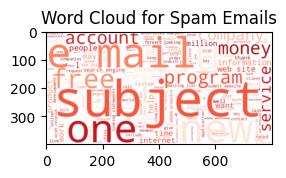

In [43]:
plt.subplot(2, 2, 1)
spam_words = ' '.join(data[data['spam'] == 1]['processed_text'])
wordcloud_spam = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_words)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')

Text(0.5, 1.0, 'Word Cloud for Non-Spam Emails')

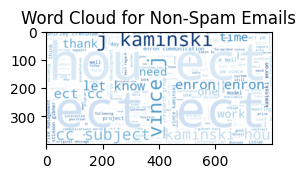

In [44]:
plt.subplot(2, 2, 2)
non_spam_words = ' '.join(data[data['spam'] == 0]['processed_text'])
wordcloud_non_spam = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(non_spam_words)
plt.imshow(wordcloud_non_spam, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam Emails')

Text(0, 0.5, 'Count')

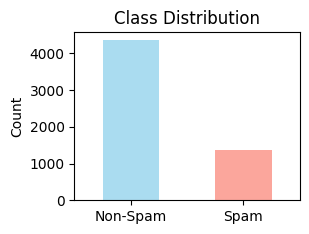

In [45]:
plt.subplot(2, 2, 3)
data['spam'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
plt.xticks([0, 1], ['Non-Spam', 'Spam'], rotation='horizontal')
plt.title('Class Distribution')
plt.ylabel('Count')

In [46]:
data['avg_word_length'] = data['processed_text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

<ipython-input-47-498c357c3cab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='spam', y='avg_word_length', data=data, palette='Set2')


Text(0, 0.5, 'Average Word Length')

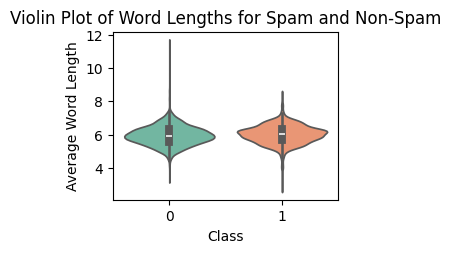

In [47]:
plt.subplot(2, 2, 4)
sns.violinplot(x='spam', y='avg_word_length', data=data, palette='Set2')
plt.title('Violin Plot of Word Lengths for Spam and Non-Spam')
plt.xlabel('Class')
plt.ylabel('Average Word Length')

In [48]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>